# Práctica de SVM

### Daniel Marín López

Tenemos generado un conjunto de datos sintéticos con dos clases. Se pide:

- Crear dos modelos usando SVM para predecir las etiquetas de las clases, el primero con un kernel lineal y el segundo con RBF.
  - Se debe escoger el parámetro C mediante validación cruzada.
- Graficar las fronteras de decisión para cada modelo.
- Mostrar la precisión de cada modelo y su informe de clasificación.
- Mostrar la matriz de confusión de cada modelo.

In [10]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

## Generación de los datos sintéticos

In [2]:
SEED = 41
TEST = 0.2
SAMPLES = 500
NOISE = 0.2

X, y = make_moons(n_samples=SAMPLES, noise=NOISE, random_state=SEED)

## Visualización de los datos

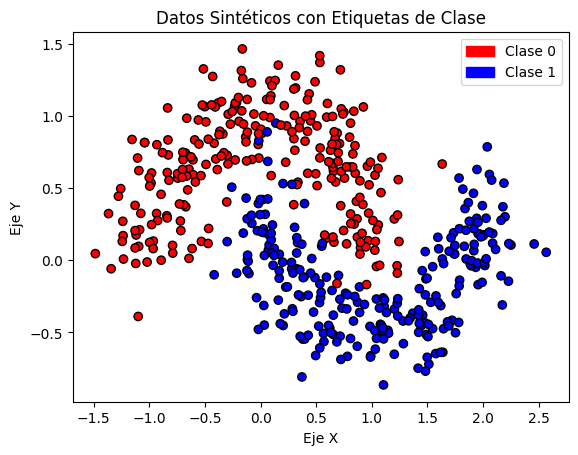

In [3]:
COLORS = np.array(["red", "blue"])

plt.scatter(X[:, 0], X[:, 1], c=COLORS[y], edgecolor='k')

plt.title('Datos Sintéticos con Etiquetas de Clase')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

legend_labels = [Patch(color=color, label=f"Clase {i}") for i, color in enumerate(COLORS)]
plt.legend(handles=legend_labels)

plt.show()

## Datos de entrenamiento y prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST, random_state=SEED)

## Validación cruzada

In [5]:
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

SVC_C = {}

for kernel in ['linear', 'rbf']:
    grid_search = GridSearchCV(SVC(kernel=kernel), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    SVC_C[kernel] = grid_search.best_params_['C']

    best_score = grid_search.best_score_
    print(f"Mejor puntuación para {kernel}: {best_score}")
    print(f"Mejores parámetros para {kernel}: {grid_search.best_params_}")

Mejor puntuación para linear: 0.8724999999999999
Mejores parámetros para linear: {'C': 1}
Mejor puntuación para rbf: 0.9600000000000002
Mejores parámetros para rbf: {'C': 10}


## Creación de los modelos

In [6]:
SVC_linear = SVC(kernel='linear', C=SVC_C['linear'])
SVC_rbf = SVC(kernel='rbf', C=SVC_C['rbf'])

SVC_linear.fit(X_train, y_train)
SVC_rbf.fit(X_train, y_train)

SVC(C=10)

## Pruebas

In [7]:
y_pred_linear = SVC_linear.predict(X_test)
y_pred_rbf = SVC_rbf.predict(X_test)

print("Informe de clasificación para SVC lineal:")
print(classification_report(y_test, y_pred_linear))

print("Informe de clasificación para SVC RBF:")
print(classification_report(y_test, y_pred_rbf))

Informe de clasificación para SVC lineal:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88        51
           1       0.83      0.98      0.90        49

    accuracy                           0.89       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.89      0.89       100

Informe de clasificación para SVC RBF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        49

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



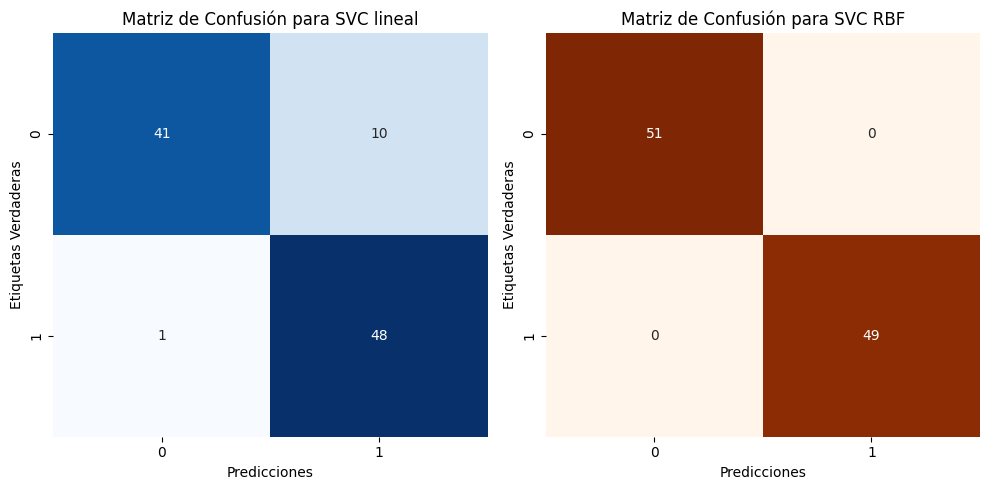

In [8]:
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión para SVC lineal')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')

plt.subplot(1, 2, 2)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Matriz de Confusión para SVC RBF')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')

plt.tight_layout()
plt.show()

## Gráfica de los límites

<Figure size 1500x600 with 0 Axes>

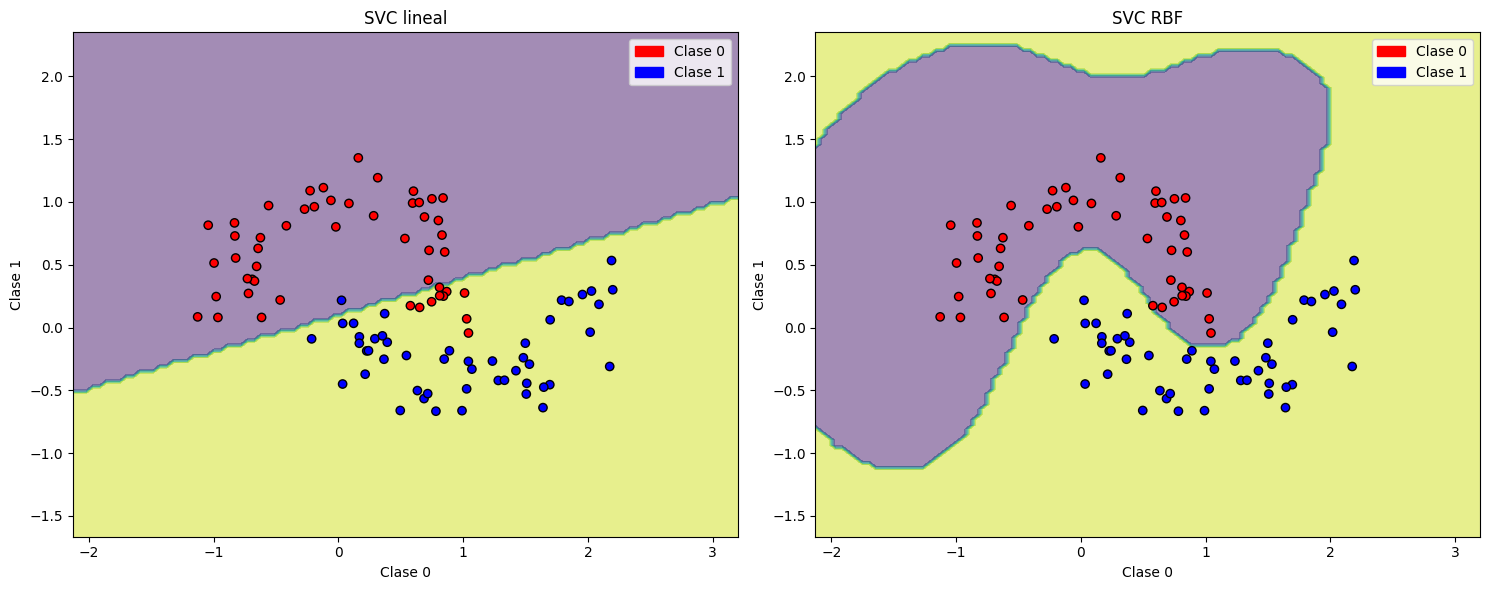

In [20]:
def plot_decision_boundary(model, X, y, ax, title):
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        response_method="predict",
        alpha=0.5,
        ax=ax
    )

    # Grafica los puntos de datos
    # Use y_test for colors since we are plotting X_test
    disp.ax_.scatter(X[:, 0], X[:, 1], c=[COLORS[i] for i in y], edgecolor="k", label="Train")

    # Configura el título y las etiquetas
    disp.ax_.set_title(title)
    disp.ax_.set_xlabel("Clase 0")  # Ajusta si es necesario
    disp.ax_.set_ylabel("Clase 1")  # Ajusta si es necesario

    # Agrega una leyenda
    legend_labels = [Patch(color=color, label=f"Clase {i}") for i, color in enumerate(COLORS)]

    disp.ax_.legend(handles=legend_labels)

plt.figure(figsize=(15, 6))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

plot_decision_boundary(SVC_linear, X_test, y_test, axs[0], "SVC lineal")

plot_decision_boundary(SVC_rbf, X_test, y_test, axs[1], "SVC RBF")

plt.tight_layout()
plt.show()